Group Members

Manan Parikh - 202003005

Vraj Chaudhari - 202003006

Shreyansh Kunjera - 202003031

In [1]:
import random
import numpy as np
from matplotlib import pyplot as plt
import scipy
import scipy.special

In [2]:
# Defines all of the necessary parameters
N = 50 # Defines the total number of steps our walker will take
pr = 0.5 # Defines the probability of our walker stepping to the right
i = 0 # Defines the initial position of our walker


def random_walk(pr, N, i):
    position = i
    # Repeatedly queries our random variable and moves our walker for the specif

    for j in range(N):

        coin_flip = list(np.random.choice(2, 1, p=[1-pr, pr])) # Flips our weigh
        position += 2*coin_flip[0]-1 # Moves our walker according to the coin fl

    return position


print("The walker is located at: x = {var}".format(var = random_walk(pr, N, i)))

The walker is located at: x = 4


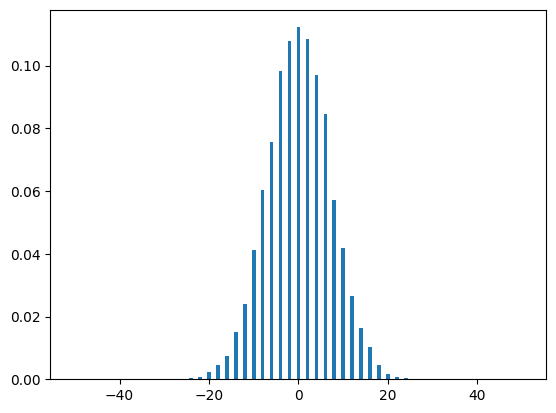

In [3]:
def dist(runs, N):
    positions = range(-1*N, N+1)
    instances = [0 for i in range(-1*N, N+1)]
    for k in range(runs):
        result = random_walk(pr, N, i)
        instances[positions.index(result)] += 1
    plt.bar(positions, [n/runs for n in instances])
    plt.show()
        
        
dist(10000, N)

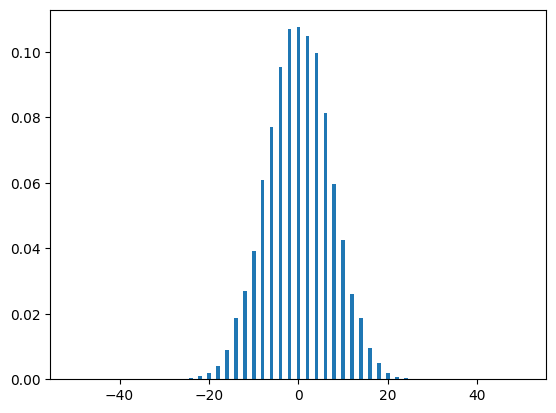

In [4]:
run_range = [10000]
for run in run_range:
    dist(run, N)

In [5]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq
    print("installed cirq.")
    import cirq
    
    
import cirq_google

In [6]:
number_qubits = 7
qubits = cirq.GridQubit.rect(1, number_qubits)
print(qubits)

[cirq.GridQubit(0, 0), cirq.GridQubit(0, 1), cirq.GridQubit(0, 2), cirq.GridQubit(0, 3), cirq.GridQubit(0, 4), cirq.GridQubit(0, 5), cirq.GridQubit(0, 6)]


In [7]:
def initial_state():
    yield cirq.X.on(cirq.GridQubit(0, 1))
    yield cirq.X.on(cirq.GridQubit(0, number_qubits))

In [10]:
def walk_step():
    # "Flip" the coin vector
    yield cirq.H.on(cirq.GridQubit(0, number_qubits))
    
    # Implement the Addition Operator
    yield cirq.X.on(cirq.GridQubit(0, number_qubits))
    
    for i in range(number_qubits, 0, -1):
        controls = [cirq.GridQubit(0, v) for v in range(number_qubits, i-1, -1)]
        yield cirq.X.on(cirq.GridQubit(0, i-1)).controlled_by(*controls)
        if (i > 1):
            yield cirq.X.on(cirq.GridQubit(0, i-1))
    yield cirq.X.on(cirq.GridQubit(0, number_qubits))
    
    # Implement the Subtraction Operator
    for i in range(1, number_qubits+1):
        controls = [cirq.GridQubit(0, v) for v in range(number_qubits, i-1, -1)]
        yield cirq.X.on(cirq.GridQubit(0, i-1)).controlled_by(*controls)
        if (i < number_qubits):
            yield cirq.X.on(cirq.GridQubit(0, i))

In [11]:
number_qubits = 7
iterator = 30
sample_number = 5000

def generate_walk(number_qubits, iterator, sample_number):
    circuit = cirq.Circuit()
    circuit.append(initial_state())
    for j in range(iterator):
        circuit.append(walk_step())
    circuit.append(cirq.measure(*qubits, key='x'))
    simulator = cirq.Simulator()
    result = simulator.run(circuit, repetitions=sample_number)
    final = result.histogram(key='x')
    return final


final = generate_walk(number_qubits, iterator, sample_number)
print(final)

Counter({12: 1185, 14: 650, 20: 359, 10: 315, 16: 282, 52: 272, 18: 193, 48: 158, 22: 155, 30: 135, 28: 132, 26: 132, 54: 130, 40: 126, 38: 111, 32: 107, 42: 101, 24: 99, 34: 97, 36: 89, 44: 67, 46: 48, 50: 25, 8: 18, 56: 11, 58: 2, 6: 1})


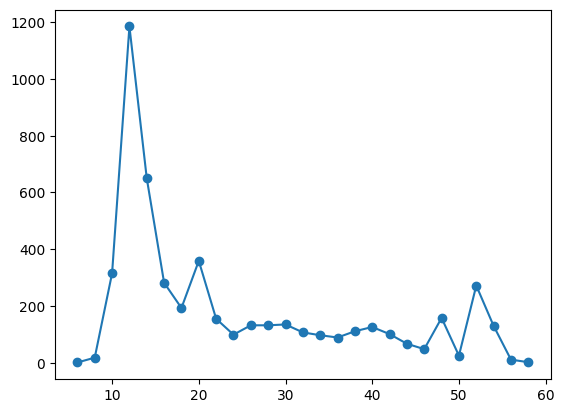

In [12]:
def graph(final):
    x_arr = list(final.keys())
    y_arr = [dict(final)[j] for j in dict(final).keys()]
    x_arr_final = []
    y_arr_final = []
    while (len(x_arr) > 0):
        x_arr_final.append(min(x_arr))
        y_arr_final.append(y_arr[x_arr.index(min(x_arr))])
        holder = x_arr.index(min(x_arr))
        del x_arr[holder]
        del y_arr[holder]
    plt.plot(x_arr_final, y_arr_final)
    plt.scatter(x_arr_final, y_arr_final)
    plt.show()
    
    
graph(final)

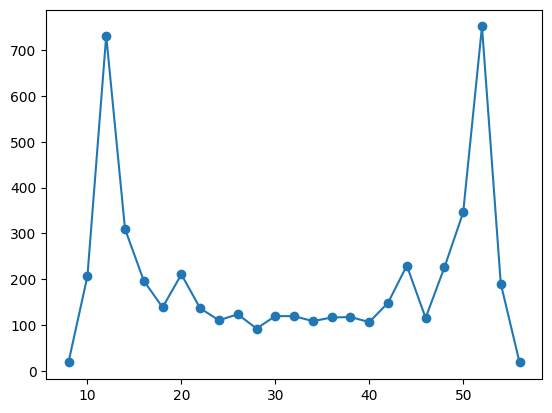

In [13]:
def initial_state():
    yield cirq.X.on(cirq.GridQubit(0, 1))
 
    yield cirq.H.on(cirq.GridQubit(0, number_qubits))
    yield cirq.S.on(cirq.GridQubit(0, number_qubits))
    
    
final = generate_walk(number_qubits, iterator, sample_number)
graph(final)

In [15]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.circuit.library import QFT
from numpy import pi
from qiskit.quantum_info import Statevector
from matplotlib import pyplot as plt
import numpy as np
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

ModuleNotFoundError: No module named 'ipywidgets'

In [16]:
one_step_circuit = QuantumCircuit(6, name=' ONE STEP')
# Coin operator
one_step_circuit.h([4,5])
one_step_circuit.z([4,5])
one_step_circuit.cz(4,5)
one_step_circuit.h([4,5])
one_step_circuit.draw()

q_0: ──────────────────
                       
q_1: ──────────────────
                       
q_2: ──────────────────
                       
q_3: ──────────────────
     ┌───┐┌───┐   ┌───┐
q_4: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_5: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [17]:
# Shift operator function for 4d-hypercube
def shift_operator(circuit):
    for i in range(0,4):
        circuit.x(4)
    if i%2==0:
 circuit.x(5)
 circuit.ccx(4,5,i)
shift_operator(one_step_circuit)
one_step_gate = one_step_circuit.to_instruction()
one_step_circuit.draw()

IndentationError: expected an indented block after 'for' statement on line 3 (128197418.py, line 4)